[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chrisbrown/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/chrisbrown/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Train size: 1400
Test  size: 300
Validation size: 300
Vocabulary size: 500
Decision Tree with CountVectorizer Accuracy: 0.46
              precision    recall  f1-score   support

       anger       0.37      0.53      0.43        36
        fear       0.37      0.25      0.30        44
         joy       0.56      0.45      0.50       108
        love       0.60      0.49      0.54        37
     sadness       0.44      0.57      0.50        65
    surprise       0.25      0.40      0.31        10

    accuracy                           0.46       300
   macro avg       0.43      0.45      0.43       300
weighted avg       0.48      0.46      0.46       300



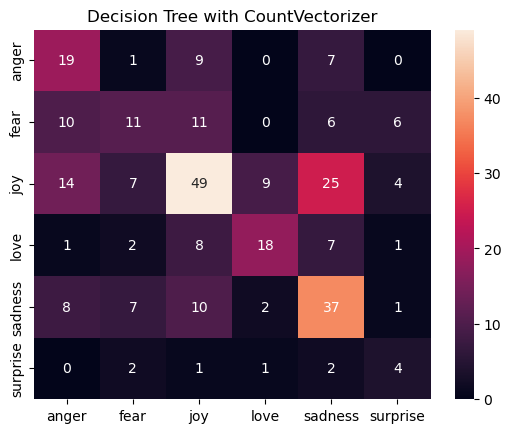

Random Forest with CountVectorizer Accuracy: 0.55
              precision    recall  f1-score   support

       anger       0.52      0.39      0.44        36
        fear       0.56      0.23      0.32        44
         joy       0.54      0.82      0.65       108
        love       0.94      0.41      0.57        37
     sadness       0.48      0.49      0.49        65
    surprise       0.44      0.40      0.42        10

    accuracy                           0.55       300
   macro avg       0.58      0.46      0.48       300
weighted avg       0.57      0.55      0.53       300



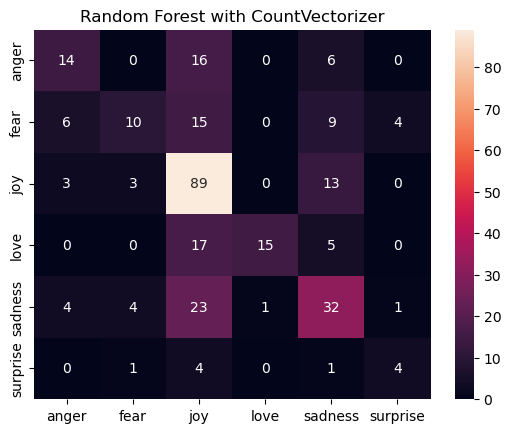

Logistic Regression with CountVectorizer Accuracy: 0.46
              precision    recall  f1-score   support

       anger       0.33      0.36      0.35        36
        fear       0.28      0.11      0.16        44
         joy       0.54      0.70      0.61       108
        love       0.71      0.27      0.39        37
     sadness       0.39      0.51      0.44        65
    surprise       0.67      0.20      0.31        10

    accuracy                           0.46       300
   macro avg       0.49      0.36      0.38       300
weighted avg       0.47      0.46      0.44       300



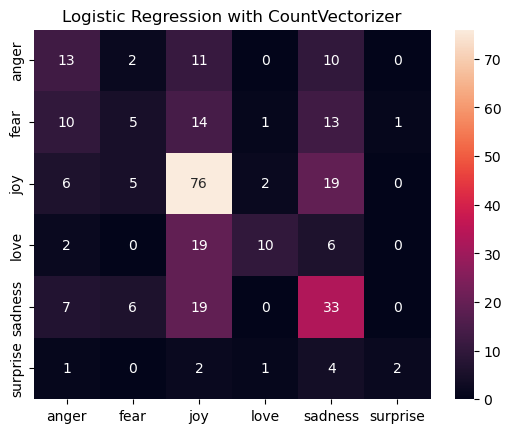

Decision Tree with TfidfVectorizer Accuracy: 0.43
              precision    recall  f1-score   support

       anger       0.44      0.22      0.30        36
        fear       0.40      0.05      0.08        44
         joy       0.40      0.90      0.55       108
        love       0.60      0.16      0.26        37
     sadness       0.71      0.23      0.35        65
    surprise       0.25      0.10      0.14        10

    accuracy                           0.43       300
   macro avg       0.47      0.28      0.28       300
weighted avg       0.49      0.43      0.36       300



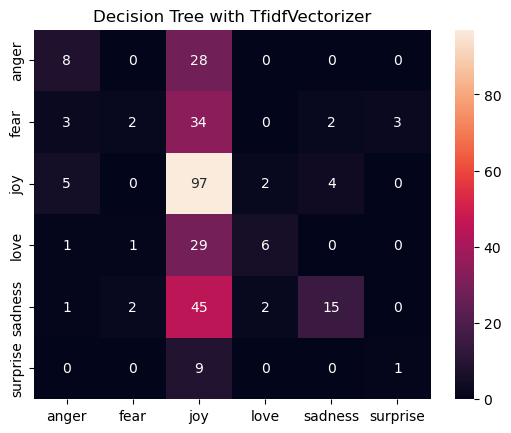

Random Forest with TfidfVectorizer Accuracy: 0.44
              precision    recall  f1-score   support

       anger       0.60      0.17      0.26        36
        fear       0.25      0.02      0.04        44
         joy       0.41      0.97      0.58       108
        love       0.86      0.16      0.27        37
     sadness       0.74      0.22      0.33        65
    surprise       0.33      0.10      0.15        10

    accuracy                           0.44       300
   macro avg       0.53      0.27      0.27       300
weighted avg       0.53      0.44      0.36       300



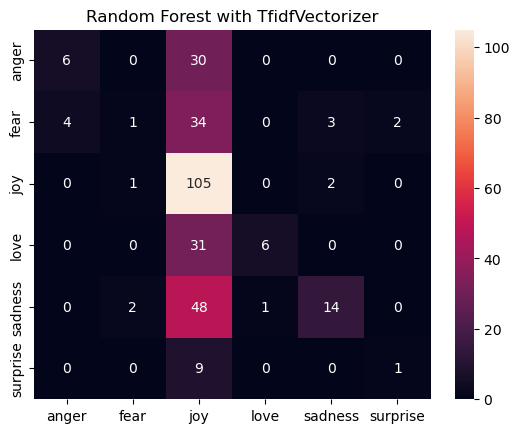

Logistic Regression with TfidfVectorizer Accuracy: 0.50
              precision    recall  f1-score   support

       anger       0.52      0.42      0.46        36
        fear       0.44      0.16      0.23        44
         joy       0.46      0.92      0.62       108
        love       1.00      0.08      0.15        37
     sadness       0.64      0.38      0.48        65
    surprise       0.00      0.00      0.00        10

    accuracy                           0.50       300
   macro avg       0.51      0.33      0.32       300
weighted avg       0.56      0.50      0.43       300



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


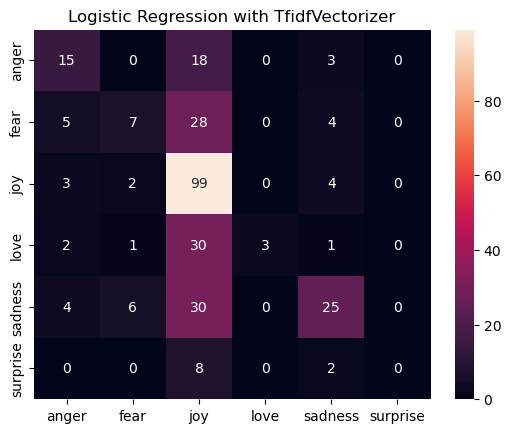

Predictions for new sentences: ['joy' 'anger']


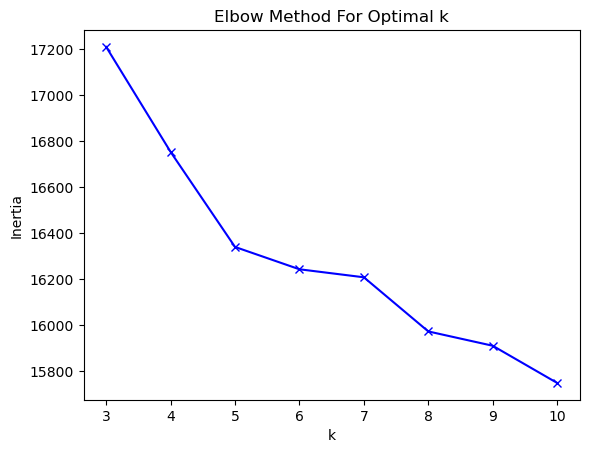

                                                   text  emotion  cluster
49    i hope i m proved wrong but i can t see the en...  sadness        3
1389  i feel safe around you and i never wanna lose ...      joy        4
1861  im tired of feeling lethargic hating to work o...  sadness        1
292   i can say is that i feel like myself when i pu...     love        2
1512  i feel that i am not valued i am under paid an...      joy        1
...                                                 ...      ...      ...
383   i still cannot find the damned tin certificate...      joy        3
620   i shall move right along to the post interview...      joy        3
1364  im feeling stupid feeling stupid coming back t...  sadness        1
1976  i trust heavily when i feel that the trust is ...      joy        4
429                                     i feel tortured    anger        4

[300 rows x 3 columns]


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import re
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') 

with open("val.txt", "r", encoding="utf-8") as file:
    lines = file.read().splitlines()

data = []
for line in lines:
    if ";" in line:
        text, emotion = line.rsplit(";", 1)
        data.append({"text": text.strip(), "emotion": emotion.strip()})

df = pd.DataFrame(data)

train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
test_df, val_df = train_test_split(temp_df, test_size=0.5, random_state=42)

print("Train size:", len(train_df))
print("Test  size:", len(test_df))
print("Validation size:", len(val_df))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text) 
    tokens = word_tokenize(text)
    return tokens

all_tokens = []
for text in df['text']:
    all_tokens.extend(preprocess_text(text))

vocab = [word for word, _ in Counter(all_tokens).most_common(500)]
print("Vocabulary size:", len(vocab))


binary_vectorizer = CountVectorizer(vocabulary=vocab, binary=True)
X_train_binary = binary_vectorizer.fit_transform(train_df['text'])
X_test_binary = binary_vectorizer.transform(test_df['text'])
X_val_binary = binary_vectorizer.transform(val_df['text'])

count_vectorizer = CountVectorizer(vocabulary=vocab, binary=False)
X_train_count = count_vectorizer.fit_transform(train_df['text'])
X_test_count = count_vectorizer.transform(test_df['text'])
X_val_count = count_vectorizer.transform(val_df['text'])

tfidf_vectorizer_binary = TfidfVectorizer(vocabulary=vocab, binary=True)
X_train_tfidf_binary = tfidf_vectorizer_binary.fit_transform(train_df['text'])
X_test_tfidf_binary = tfidf_vectorizer_binary.transform(test_df['text'])
X_val_tfidf_binary = tfidf_vectorizer_binary.transform(val_df['text'])

tfidf_vectorizer = TfidfVectorizer(vocabulary=vocab, binary=False)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['text'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['text'])
X_val_tfidf = tfidf_vectorizer.transform(val_df['text'])

y_train = train_df['emotion']
y_test = test_df['emotion']


dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_count, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_count, y_train)

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_count, y_train)

def evaluate_model(X_test, y_test, model, title):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"{title} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(title)
    plt.show()

evaluate_model(X_test_count, y_test, dt, "Decision Tree with CountVectorizer")
evaluate_model(X_test_count, y_test, rf, "Random Forest with CountVectorizer")
evaluate_model(X_test_count, y_test, lr, "Logistic Regression with CountVectorizer")

evaluate_model(X_test_tfidf, y_test, dt, "Decision Tree with TfidfVectorizer")
evaluate_model(X_test_tfidf, y_test, rf, "Random Forest with TfidfVectorizer")
evaluate_model(X_test_tfidf, y_test, lr, "Logistic Regression with TfidfVectorizer")

new_sentences = [
    "I am feeling so happy today because of the sunshine.",
    "I feel angry because someone insulted me."
]

new_sentences_processed = [' '.join(preprocess_text(sent)) for sent in new_sentences]
X_new = count_vectorizer.transform(new_sentences_processed)

predictions = lr.predict(X_new)
print("Predictions for new sentences:", predictions)

inertias = []
K = range(3, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_count)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_count)

X_test_clusters = kmeans.predict(X_test_count)
test_df['cluster'] = X_test_clusters
print(test_df[['text', 'emotion', 'cluster']])

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import streamlit as st

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def load_data():
    df = pd.read_csv('image_caption.txt', sep='\t')
    return df

def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    text = re.sub(r'\d+', '', text)
    
    tokens = word_tokenize(text)
    
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    return ' '.join(tokens)

def create_tfidf_matrix(df):
    df['processed_caption'] = df['caption'].apply(preprocess_text)
    
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df['processed_caption'])
    
    return vectorizer, tfidf_matrix

def search(query, vectorizer, tfidf_matrix, df, top_k=10):
    processed_query = preprocess_text(query)
    
    query_vector = vectorizer.transform([processed_query])
    
    similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()
    
    top_indices = similarities.argsort()[-top_k:][::-1]
    
    results = df.iloc[top_indices][['ID', 'caption']].copy()
    results['similarity'] = similarities[top_indices]
    
    return results

def main():
    df = load_data()
    
    vectorizer, tfidf_matrix = create_tfidf_matrix(df)
    
    queries = [
        "angiographic image shows normal coronary artery",
        "fluoroscopy image demonstrating of balloon occlusion"
    ]
    
    for i, query in enumerate(queries, 1):
        print(f"\nQuery {i}: {query}")
        results = search(query, vectorizer, tfidf_matrix, df)
        print("\nTop 10 Results:")
        print(results.to_string(index=False))
    
    st.title("Medical Image Caption Search")
    
    query = st.text_input("Enter your search query:")
    top_k = st.slider("Number of results:", 1, 20, 10)
    
    if st.button("Search"):
        if query:
            results = search(query, vectorizer, tfidf_matrix, df, top_k)
            st.write("### Search Results")
            for _, row in results.iterrows():
                st.write(f"**ID:** {row['ID']}")
                st.write(f"**Caption:** {row['caption']}")
                st.write(f"**Similarity:** {row['similarity']:.4f}")
                st.write("---")
        else:
            st.warning("Please enter a query!")

if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chrisbrown/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chrisbrown/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chrisbrown/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Query 1: angiographic image shows normal coronary artery

Top 10 Results:
                                   ID                                                                                                                                                                         caption  similarity
ImageCLEFmedCaption_2022_train_000019                                                                                                                                  angiographic image show normal coronary artery    1.000000
ImageCLEFmedCaption_2022_train_000756                                                                                                                                                    normal leave coronary artery    0.638182
ImageCLEFmedCaption_2022_train_000382                                                                                                                  coronary angiography with normal coronary angiographic finding    0.635961
ImageCLEFmedCaption_2

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chrisbrown/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chrisbrown/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chrisbrown/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



=== (a) Loading and Splitting Data ===
Training samples: 35000
Test samples: 15000

=== (b) Preprocessing Text ===
Example processed review: br br according reviewer year player yearold college kid enter grad school jolly jokebr br synthesiz...

=== (c) TF-IDF Feature Representation ===

=== (d) IDF Scores for First 50 Keywords ===
                   Keyword  IDF Score
0                       aa   8.978225
1                      aaa   9.160547
2                 aaaaaaah  10.769985
3         aaaaaaahhhhhhggg  10.769985
4                  aaaaagh  10.769985
5                   aaaaah  10.364520
6  aaaaarrrrrrgggggghhhhhh  10.769985
7              aaaaatchkah  10.769985
8                   aaaaaw  10.769985
9               aaaahhhhhh  10.769985

=== (e) KNN Classification ===
K=1, Accuracy=0.7460
K=2, Accuracy=0.7457
K=3, Accuracy=0.7649
K=4, Accuracy=0.7707
K=5, Accuracy=0.7739
K=6, Accuracy=0.7751
K=7, Accuracy=0.7739
K=8, Accuracy=0.7759
K=9, Accuracy=0.7750


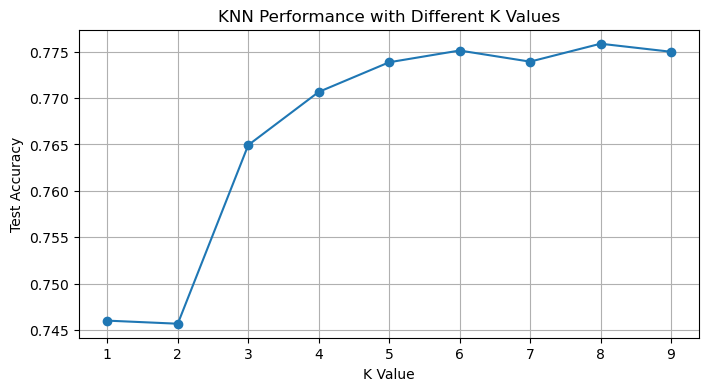


=== (f) Training Classifiers ===

--- Unigrams Features ---

Random Forest (Unigrams) Accuracy: 0.8448
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      7443
           1       0.85      0.84      0.84      7557

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000

Confusion Matrix:
[[6342 1101]
 [1227 6330]]

Logistic Regression (Unigrams) Accuracy: 0.8909
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7443
           1       0.88      0.91      0.89      7557

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000

Confusion Matrix:
[[6507  936]
 [ 701 6856]]

--- Unigrams+Bigrams Features ---


KeyboardInterrupt: 

In [14]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


print("\n=== (a) Loading and Splitting Data ===")
df = pd.read_csv('movie_data.csv')  
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
print(f"Training samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")


print("\n=== (b) Preprocessing Text ===")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    tokens = word_tokenize(text)  
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  
    return ' '.join(tokens)

train_df['processed_review'] = train_df['review'].apply(preprocess_text)
test_df['processed_review'] = test_df['review'].apply(preprocess_text)
print("Example processed review:", train_df['processed_review'].iloc[0][:100] + "...")


print("\n=== (c) TF-IDF Feature Representation ===")
unigram_vectorizer = TfidfVectorizer(ngram_range=(1, 1))
X_train_uni = unigram_vectorizer.fit_transform(train_df['processed_review'])
X_test_uni = unigram_vectorizer.transform(test_df['processed_review'])

uni_bi_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_uni_bi = uni_bi_vectorizer.fit_transform(train_df['processed_review'])
X_test_uni_bi = uni_bi_vectorizer.transform(test_df['processed_review'])

bigram_vectorizer = TfidfVectorizer(ngram_range=(2, 2))
X_train_bi = bigram_vectorizer.fit_transform(train_df['processed_review'])
X_test_bi = bigram_vectorizer.transform(test_df['processed_review'])

y_train = train_df['sentiment']
y_test = test_df['sentiment']


print("\n=== (d) IDF Scores for First 50 Keywords ===")
idf_df = pd.DataFrame({
    'Keyword': unigram_vectorizer.get_feature_names_out()[:50],
    'IDF Score': unigram_vectorizer.idf_[:50]
})
print(idf_df.head(10))  


print("\n=== (e) KNN Classification ===")
k_values = range(1, 10)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_uni, y_train)  
    y_pred = knn.predict(X_test_uni)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    print(f"K={k}, Accuracy={accuracy:.4f}")

plt.figure(figsize=(8, 4))
plt.plot(k_values, scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Test Accuracy')
plt.title('KNN Performance with Different K Values')
plt.grid()
plt.show()


print("\n=== (f) Training Classifiers ===")
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, feature_type):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} ({feature_type}) Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    return accuracy

rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

feature_sets = {
    'Unigrams': (X_train_uni, X_test_uni),
    'Unigrams+Bigrams': (X_train_uni_bi, X_test_uni_bi),
    'Bigrams': (X_train_bi, X_test_bi)
}

results = []
for feature_name, (X_train, X_test) in feature_sets.items():
    print(f"\n--- {feature_name} Features ---")
    rf_acc = evaluate_model(rf, X_train, X_test, y_train, y_test, "Random Forest", feature_name)
    lr_acc = evaluate_model(lr, X_train, X_test, y_train, y_test, "Logistic Regression", feature_name)
    results.append({
        'Features': feature_name,
        'Random Forest': rf_acc,
        'Logistic Regression': lr_acc
    })


print("\n=== (g) Model Comparison ===")
results_df = pd.DataFrame(results)
print(results_df)

results_df.set_index('Features').plot(kind='bar', figsize=(10, 5))
plt.title('Classifier Performance by Feature Type')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.9)
plt.show()